#                                                              Project Report

#### Correlation Analysis: COVID-19 Total Cases and Deaths in Asian and European Countries



## Introduction
COVID-19 is a contagious illness caused by the SARS-CoV-2 virus. It started in Wuhan, China, in December 2019 and soon spread globally, leading to a worldwide pandemic. According to the World Health Organization (WHO), over 3.4 million people have died from COVID-19. In this research project, I'll analyze whether countries with more COVID-19 cases also have more deaths cases, aiming to determine if there's a strong  correlation between the number of covid-19 cases and deaths cases.

In [34]:
# install necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [35]:
# import necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Methods
### Data Scource
In this project, two Kaggle datasets are used. The first dataset contains COVID-19 cases in Asia as of October 10, 2021, and the second dataset provides COVID-19 data for Europe as of January 19, 2023. Both datasets have the same column names and open data licenses. This consistency in naming and licensing influenced the selection of these datasets for the project.
### Data pipeline 
The following data pipeline steps are followed.

Data Collection: 
Pulled datasets COVID-19 Asian and European countries datasets from Kaggle using the Kaggle API.

Data Loading: 
Loads the pulled datasets into pandas DataFrames.

Data Transformation & Cleaning:
Renames columns for the European COVID-19 dataset to make them consistent with the Asian COVID-19 dataset. Checking for missing or null values in both datasets and filling them with the mean where values are absent. Finally,
selects only the relevant columns from both datasets.

Data Storage:
Stores the transformed Asian COVID-19 data into an SQLite database named asia_covid.sqlite. Similary,
Stores the transformed European COVID-19 data into an SQLite database named europe_covid.sqlite


In [36]:
# Connect to SQLite database
conn1 = sqlite3.connect('../data/asia_covid.sqlite')
conn2 = conn2 = sqlite3.connect('../data/europe_covid.sqlite')

In [37]:
# Query data from SQLite table and fetch into a DataFrame
query1 = "SELECT * FROM asia"
query2 = "SELECT *FROM europe"
df_asia = pd.read_sql_query(query1, conn1)
df_europe = pd.read_sql_query(query2,conn2)

In [38]:
# Close the database connection
conn1.close()
conn2.close()

In [39]:
# Explore and manipulate the DataFrame
print(df_asia.head()) 

      Country  TotalCases  TotalDeaths  TotalRecovered  ActiveCases  \
0       Yemen        9369       1778.0            5921         1670   
1     Vietnam      839662      20555.0          782199        36908   
2  Uzbekistan      178637       1271.0          174213         3153   
3         UAE      737890       2114.0          731295         4481   
4      Turkey     7444552      66180.0         6893476       484896   

   TotalTests  
0    265253.0  
1  42517091.0  
2   1377915.0  
3  87246490.0  
4  89847975.0  


In [40]:
print(df_europe.head())

   Country  TotalCases  TotalDeaths  TotalRecovered  ActiveCases  TotalTests
0  Albania      334084         3595        328802.0       1687.0     1941032
1  Andorra       47781          165         47563.0         53.0      249838
2  Austria     5747540        21589       5702341.0      23610.0   205247898
3  Belarus      994037         7118        985592.0       1327.0    13646641
4  Belgium     4686147        33478       4631003.0      21666.0    36481740


In [41]:
#Checking missing or null values for asia covid dataset
print(df_asia.isnull().sum())


Country           0
TotalCases        0
TotalDeaths       1
TotalRecovered    0
ActiveCases       0
TotalTests        1
dtype: int64


In [42]:
# Calculate mean
mean_value_totaldeaths = df_asia['TotalDeaths'].mean()
mean_value_totaltests = df_asia['TotalTests'].mean()

# Impute missing values using mean
df_asia['TotalDeaths'].fillna(mean_value_totaldeaths, inplace=True)
df_asia['TotalTests'].fillna(mean_value_totaltests, inplace=True)

In [43]:
# again Checking missing or null values
print(df_asia.isnull().sum())

Country           0
TotalCases        0
TotalDeaths       0
TotalRecovered    0
ActiveCases       0
TotalTests        0
dtype: int64


In [44]:
#checking missing or null values for europe covid dataset
print(df_europe.isnull().sum())


Country           0
TotalCases        0
TotalDeaths       0
TotalRecovered    3
ActiveCases       3
TotalTests        0
dtype: int64


In [45]:
#Calculate mean
mean_value_totalrecovered = df_europe['TotalRecovered'].mean()
mean_value_activecases = df_europe['ActiveCases'].mean()

# Impute missing values using mean
df_europe['TotalRecovered'].fillna(mean_value_totaltests, inplace=True)
df_europe['ActiveCases'].fillna(mean_value_activecases, inplace=True)


In [46]:
# again checking missing or null values for europe covid dataset
print(df_europe.isnull().sum())

Country           0
TotalCases        0
TotalDeaths       0
TotalRecovered    0
ActiveCases       0
TotalTests        0
dtype: int64


In [47]:
# generate summary statistics for COVID-19 cases in asia
df_asia.describe()


,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalTests
count,4.900000e+01,49.000000,4.900000e+01,49.000000,4.900000e+01
mean,1.574671e+06,23732.937500,1.510029e+06,41393.000000,2.952919e+07
std,4.943437e+06,68131.413208,4.829174e+06,89902.688282,8.561316e+07
min,7.700000e+01,3.000000,6.400000e+01,0.000000,4.951000e+03
25%,1.150680e+05,1390.000000,9.107400e+04,1670.000000,2.509222e+06
50%,4.120790e+05,5575.000000,3.913590e+05,14787.000000,9.201621e+06
75%,9.056410e+05,17941.000000,8.474560e+05,29242.000000,2.540032e+07
max,3.397161e+07,450814.000000,3.329348e+07,484896.000000,5.836315e+08


In [48]:
# generate summary statistics for COVID-19 cases in europe
df_europe.describe()

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,TotalTests
count,4.700000e+01,47.000000,4.700000e+01,47.000000,4.700000e+01
mean,5.193760e+06,42474.723404,6.976321e+06,57501.636364,5.982183e+07
std,9.283831e+06,74795.135797,1.084136e+07,149694.302928,1.181358e+08
min,1.604000e+04,28.000000,1.595100e+04,0.000000,7.864600e+04
25%,3.159205e+05,2845.000000,4.415690e+05,1206.000000,2.159900e+06
50%,1.449824e+06,11947.000000,1.838674e+06,7595.000000,1.100243e+07
75%,5.025234e+06,36466.500000,5.521490e+06,42703.818182,3.727593e+07
max,3.946728e+07,394569.000000,3.910673e+07,920030.000000,5.225265e+08


## Results

In [49]:
# display top 7 countries with the highest number of total COVID-19 cases in asia
top_covidcases_countries_asia = df_asia.sort_values(by='TotalCases', ascending=False).head(7)
print(top_covidcases_countries_asia)


        Country  TotalCases  TotalDeaths  TotalRecovered  ActiveCases  \
36        India    33971607     450814.0        33293478       227315   
4        Turkey     7444552      66180.0         6893476       484896   
34         Iran     5702890     122592.0         5217999       362299   
35    Indonesia     4227932     142651.0         4060851        24430   
15  Philippines     2674814      39660.0         2536260        98894   
23     Malaysia     2339594      27329.0         2195669       116596   
33         Iraq     2023761      22563.0         1945366        55832   

     TotalTests  
36  583631490.0  
4    89847975.0  
34   32619228.0  
35   41624406.0  
15   21784989.0  
23   31591230.0  
33   15409353.0  


In [50]:
# display the top 7 countries with the highest number of COVID-19 deaths cases in asia
top_deathcases_countries_asia = df_asia.sort_values(by='TotalDeaths', ascending=False).head(7)
print(top_deathcases_countries_asia)


        Country  TotalCases  TotalDeaths  TotalRecovered  ActiveCases  \
36        India    33971607     450814.0        33293478       227315   
35    Indonesia     4227932     142651.0         4060851        24430   
34         Iran     5702890     122592.0         5217999       362299   
4        Turkey     7444552      66180.0         6893476       484896   
15  Philippines     2674814      39660.0         2536260        98894   
17     Pakistan     1258959      28134.0         1188562        42263   
44   Bangladesh     1562359      27688.0         1523833        10838   

     TotalTests  
36  583631490.0  
35   41624406.0  
34   32619228.0  
4    89847975.0  
15   21784989.0  
17   19911021.0  
44    9952196.0  


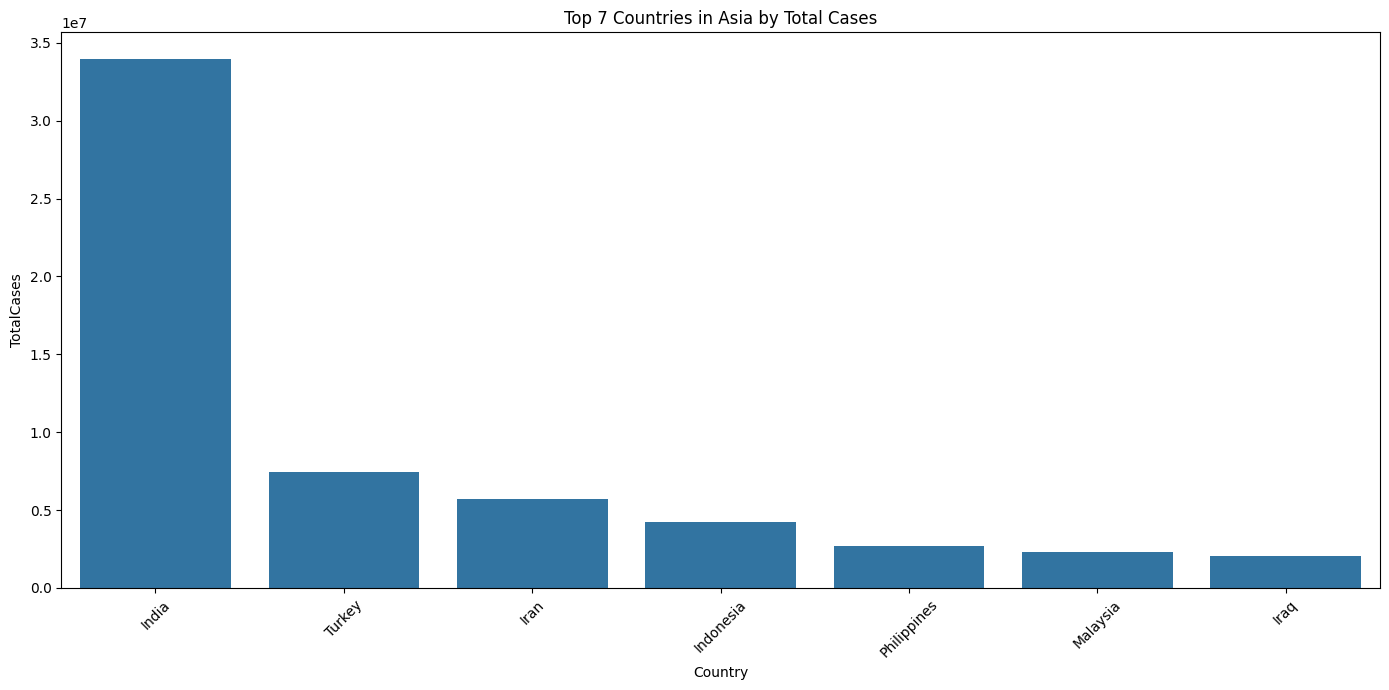

In [51]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='TotalCases', data=top_covidcases_countries_asia)
plt.title('Top 7 Countries in Asia by Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


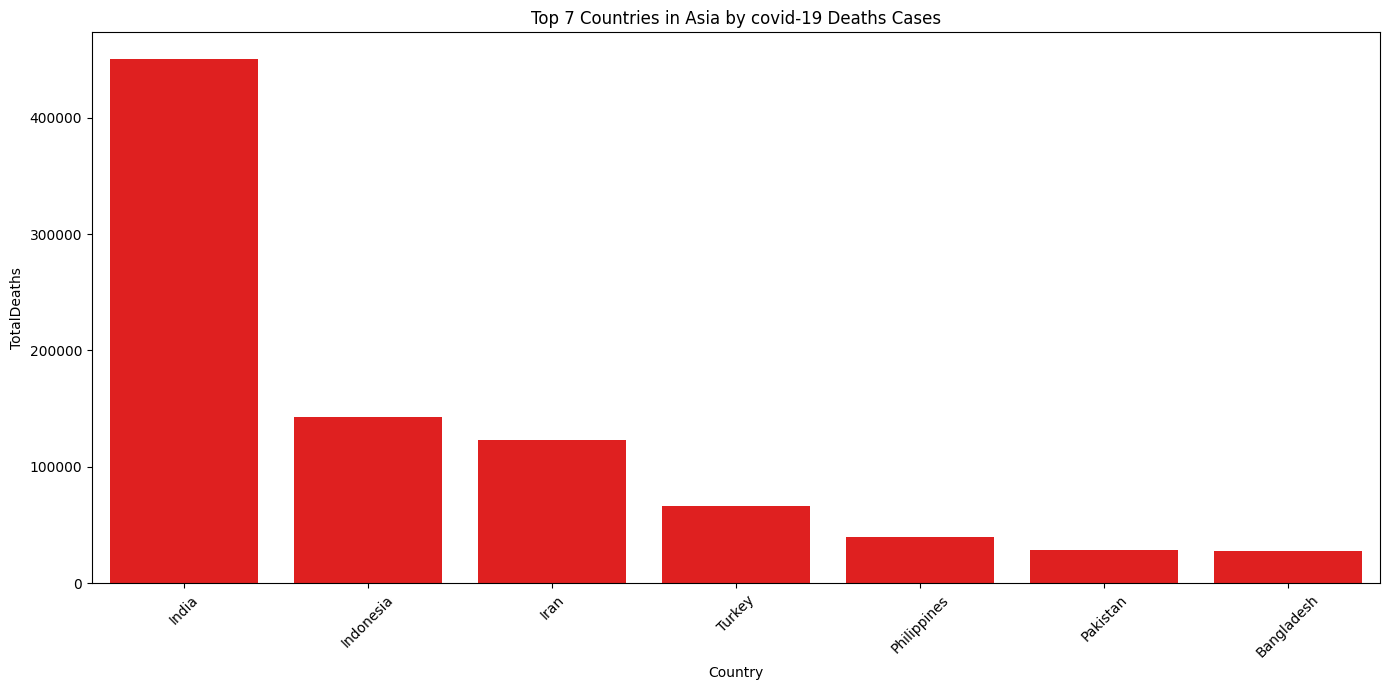

In [52]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='TotalDeaths',color='red', data=top_deathcases_countries_asia)
plt.title('Top 7 Countries in Asia by covid-19 Deaths Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

According to above barcharts, India has the highest total cases and total deaths as of October 10, 2021. Additionally, while Bangladesh does not rank within the top 7 countries in terms of total COVID-19 cases in Asia but it occupies the seventh position in total deaths.

In [53]:
# Correlation between Total Cases and Total Death in covid-19 for asia dataset
correlation_asia = df_asia['TotalCases'].corr(df_asia['TotalDeaths'])
print(f"Correlation between Total Cases and Total Deaths: {correlation_asia}")

Correlation between Total Cases and Total Deaths: 0.9734291839285208


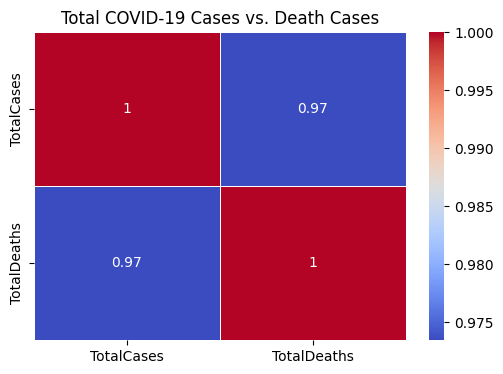

In [54]:
# Calculate the correlation matrix in covid-19 asia
correlation_matrix = df_asia[['TotalCases', 'TotalDeaths']].corr()
# Create a correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Total COVID-19 Cases vs. Death Cases')
plt.show()

In covid-19 dataset for asia, correlation between Total Cases and TotalDeaths Cases is 0.97

In [55]:
# display top 7 countries with the highest number of total COVID-19 cases in europe
top_covidcases_countries_europe = df_europe.sort_values(by='TotalCases', ascending=False).head(7)
print(top_covidcases_countries_europe)

        Country  TotalCases  TotalDeaths  TotalRecovered  ActiveCases  \
14       France    39467281       163644      39106729.0     196908.0   
15      Germany    37649808       164391      37169700.0     315717.0   
22        Italy    25363742       185993      24824106.0     353643.0   
45           UK    24243393       202157      23949907.0      91329.0   
37       Russia    21876336       394569      21293221.0     188546.0   
42        Spain    13711251       117759      13522850.0      70642.0   
31  Netherlands     8578818        22989       8534990.0      20839.0   

    TotalTests  
14   271490188  
15   122332384  
22   264182282  
45   522526476  
37   273400000  
42   471036328  
31    25984435  


In [56]:
# display the top 7 countries with the highest number of COVID-19 deaths cases in europe
top_deathcases_countries_europe = df_europe.sort_values(by='TotalDeaths', ascending=False).head(7)
print(top_deathcases_countries_europe)

    Country  TotalCases  TotalDeaths  TotalRecovered  ActiveCases  TotalTests
37   Russia    21876336       394569      21293221.0     188546.0   273400000
45       UK    24243393       202157      23949907.0      91329.0   522526476
22    Italy    25363742       185993      24824106.0     353643.0   264182282
15  Germany    37649808       164391      37169700.0     315717.0   122332384
14   France    39467281       163644      39106729.0     196908.0   271490188
34   Poland     6374645       118675       5335940.0     920030.0    38070118
42    Spain    13711251       117759      13522850.0      70642.0   471036328


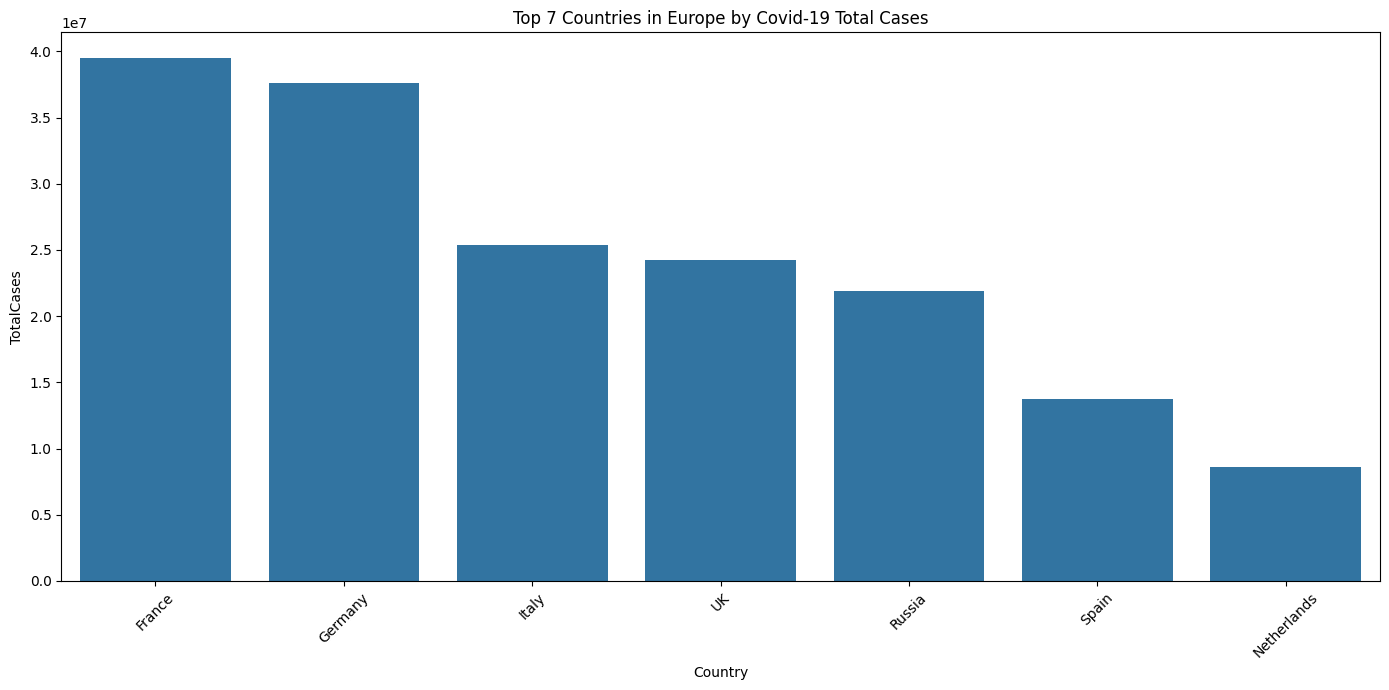

In [57]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='TotalCases', data=top_covidcases_countries_europe)
plt.title('Top 7 Countries in Europe by Covid-19 Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

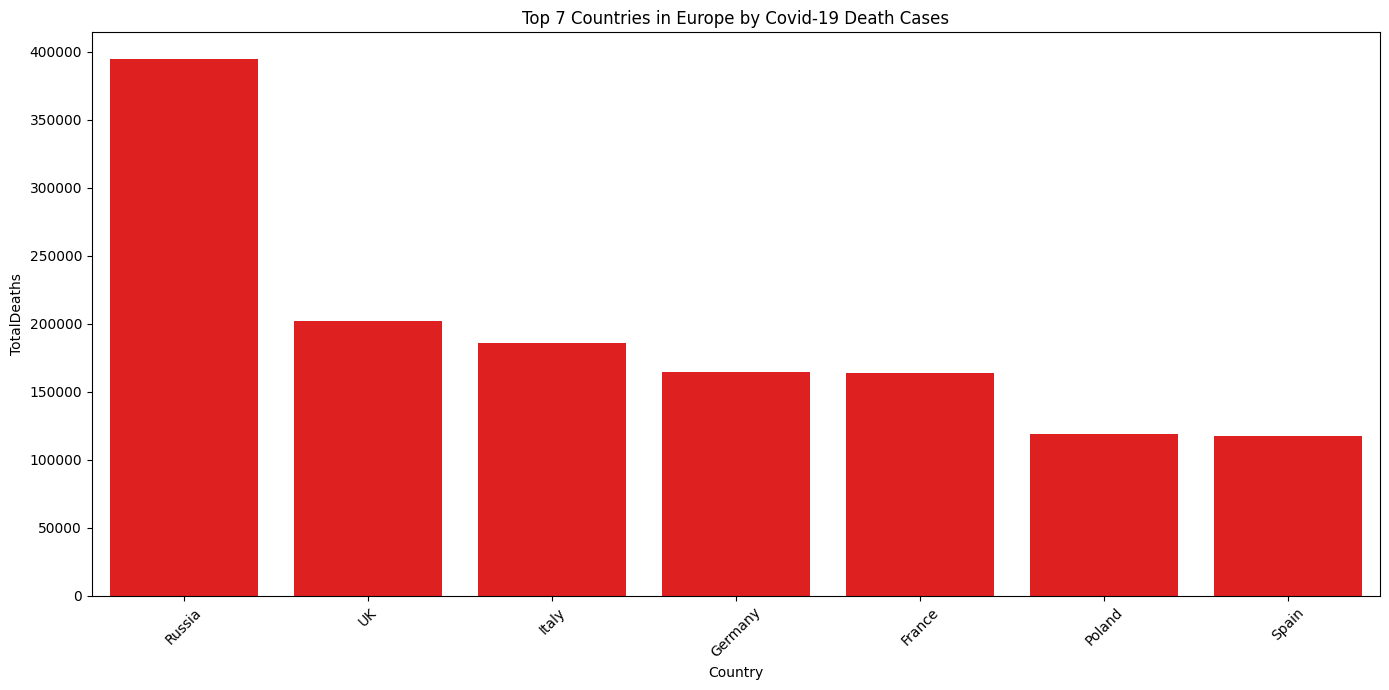

In [58]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='TotalDeaths',color='red', data=top_deathcases_countries_europe)
plt.title('Top 7 Countries in Europe by Covid-19 Death Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observing the above barcharts 'Top 7 Countries in Europe by Covid-19 Total Cases' and 'Top 7 Countries in Europe by Covid-19 Death Cases' it is clear to see that France has the most covid-19 cases in Europe, while Russia has the highest number of deaths on January 19, 2023. Although Germany has more total cases than Italy and the UK, both the UK and Italy have more lesser deaths cases than Germany.

In [59]:
# Correlation between Total Cases and Total Death in covid-19 for asia dataset
correlation_europe = df_europe['TotalCases'].corr(df_europe['TotalDeaths'])
print(f"Correlation between Total Cases and Total Deaths: {correlation_europe}")

Correlation between Total Cases and Total Deaths: 0.7898155552317462


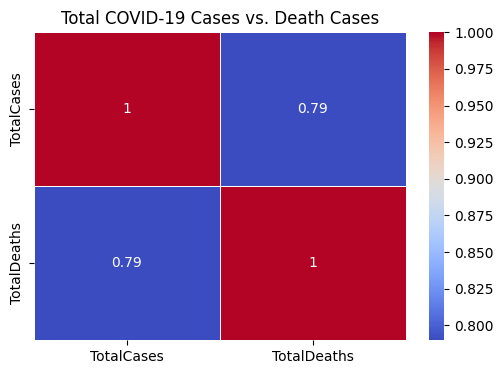

In [60]:
# Calculate the correlation matrix in covid-19 europe
correlation_matrix = df_europe[['TotalCases', 'TotalDeaths']].corr()
# Create a correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Total COVID-19 Cases vs. Death Cases')
plt.show()

In covid-19 dataset for europe, correlation between TotalCases and TotalDeaths Cases is 0.79.

## Conclusion

In conclusion, based on the analysis of barcharts, it indicates that that countries with the highest total covid-19 cases  may not always have the highest total death cases. In the Asia dataset, a strong positive correlation (0.97) exists between total cases and deaths. In Europe, it's also linked but slightly less so, with a correlation of 0.79. This means that as case numbers go up in these regions, death numbers also tend to rise.

This analysis provided is based solely on data from a single day. To obtain more precise insights, it requires to analyze multiple datasets over various time periods.To compare Asia and Europe accurately, we need data from both regions that covers the same time period, allowing for a more meaningful understanding of COVID-19 trends between the continents.